
## Análise de Fatores para Classificação de Diabéticos Empregando Modelos de Machine Learning.
### Aluno: Guilherme Morete Felix
#### Fonte do Conjunto de Dados: <https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset>. 

In [1]:
#Importando os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn import under_sampling
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score,f1_score

C:\Users\Guilherme\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Guilherme\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Etapa de Pré-Processamento dos Dados
#### Nessa etapa, será realizada uma análise descritiva e limpeza dos dados.

In [2]:
#Importando o conjunto de dados

df = pd.read_csv('diabetes_2015.csv')

In [3]:
display(df)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
#O conjunto de dados informa ter 22 colunas e 253680 valores não nulos, sendo que todas suas variávies são do tipo float.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
## De acordo com a documentação do conjunto de dados, será criado um dicionário de dados para melhor compreensão das variáveis.

dicionario = {
'Diabetes_binary':'Tradução: Possui Diabetes ou Pré-Diabetes? Valores: 0 - Não, 1 - Sim',
'HighBP':'Tradução: Possui Pressão Alta? Valores: 0 - Não, 1 - Sim',
'HighChol':'Tradução: Possui Colesterol Alto? Valores: 0 - Não, 1 - Sim',
'CholCheck':'Tradução: Fez exame de colesterol nos últimos 5 anos? Valores: 0 - Não, 1 - Sim',
'BMI':'Tradução: IMC Valores: Contínuo',
'Smoker':'Tradução: Fumou ao menos 100 cigarros em toda vida? Valores: 0 - Não, 1 - Sim',
'Stroke':'Tradução: Já teve um AVC? Valores: 0 - Não, 1 - Sim',
'HeartDiseaseorAttack':'Tradução: Possui doença coronária cardíaca ou teve infarto do miocárdio? Valores: 0 - Não, 1 - Sim',
'PhysActivity':'Tradução: Realizou atividade física nos últimos 30 dias? Valores: 0 - Não, 1 - Sim',
'Fruits':'Tradução: Consome frutas diariamente? Valores: 0 - Não, 1 - Sim',
'Veggies':'Tradução: Consome vegetais diariamente? Valores: 0 - Não, 1 - Sim',
'HvyAlcoholConsump':'Tradução: Alcoólatra?(Homens >= 14 drinks por semana. Mulheres >=7 drinks por semana) Valores: 0 - Não, 1 - Sim',
'AnyHealthcare':'Tradução: Possui alguma plano de saúde? Valores: 0 - Não, 1 - Sim',
'NoDocbcCost':'Tradução: Nos últimos 12 meses, precisou ir ao médico, porém não pode devido ao custo? Valores: 0 - Não, 1 - Sim',
'GenHlth':'Tradução: Como você avalia seu estado de saúde? Valores: 1 - Excelente, 2 - Muito bom , 3 - Bom, 4 - Ruim, 5 - Muito Ruim',
'MentHlth':'Tradução: Nos últimos 30 dias, quantos dias sua saúde mental não esteve boa? Valores: 1 até 30',
'PhysHlth':'Tradução: Nos últimos 30 dias, quantos dias sua saúde física não esteve boa? Valores: 1 até 30',
'DiffWalk':'Tradução: Você possui dificuldade ao caminhar ou ao subir escadas? Valores: 0 - Não, 1 - Sim',
'Sex':'Tradução: Qual seu gênero? Valores: 0 - Feminino, 1 - Masculino',
'Age':'Tradução: Faixa Etária Valores: 1- 18 até 24, com cada nível acrescendo 4 anos, até o nível 13(80 anos ou mais)',
'Education':'Tradução: Educação Valores: 1 - Nunca frequentou a escola ou apenas ensino primário, 2 - Conclui Ensino Fundamental, 3 - Cursou  Ensino Médio, 4 -  Concluiu Ensino Médio, 5 - Concluiu Ensino Técnico, 6 - Concluiu Graduação ',
'Income':'Tradução: Renda familiar anual Valores: 1 - Menos de $10000, 2 - Entre $10000 e $15000, 3 - Entre $15000 e $20000, 4 - Entre $20000 e $25000, 5 - Entre $25000 e $35000, 6 - Entre $35000 e $50000, 7 - Entre $50000 e $75000, 8 - Mais que $75000'

}

In [6]:
#Para melhor compreensão do dataset, vamos traduzir o nome das variáveis

df = df.rename(columns = {
                            'Diabetes_binary':'diabetes_pre_diabetes',
                            'HighBP':'possui_pressao_alta',
                            'HighChol':'possui_colesterol_alto',
                            'CholCheck':'realizou_exame_colesterol',
                            'BMI':'imc',
                            'Smoker':'fumante',
                            'Stroke':'teve_avc',
                            'HeartDiseaseorAttack':'possui_doenca_coronaria_infarto',
                            'PhysActivity':'realiza_atividade_fisica',
                            'Fruits':'consome_frutas',
                            'Veggies':'consome_vegetais',
                            'HvyAlcoholConsump':'alcoolatra',
                            'AnyHealthcare':'possui_plano_saude',
                            'NoDocbcCost':'dificuldade_financeira_realizar_consulta_medica',
                            'GenHlth':'avaliacao_estado_saude',
                            'MentHlth':'dias_estado_saude_mental_nao_boa',
                            'PhysHlth':'dias_estado_saude_fisica_nao_boa',
                            'DiffWalk':'dificuldade_caminhar_subir_escadas',
                            'Sex':'genero',
                            'Age':'faixa_etaria',
                            'Education':'escolaridade',
                            'Income':'renda_familiar_anual'
                        }
)

In [7]:
## Verificação de valores ausentes
df.isna().sum()

#O dataset aparenta não possuir nenhum valor nulo, porém é necesário verificar se não existe nenhum valor discrepante.

diabetes_pre_diabetes                              0
possui_pressao_alta                                0
possui_colesterol_alto                             0
realizou_exame_colesterol                          0
imc                                                0
fumante                                            0
teve_avc                                           0
possui_doenca_coronaria_infarto                    0
realiza_atividade_fisica                           0
consome_frutas                                     0
consome_vegetais                                   0
alcoolatra                                         0
possui_plano_saude                                 0
dificuldade_financeira_realizar_consulta_medica    0
avaliacao_estado_saude                             0
dias_estado_saude_mental_nao_boa                   0
dias_estado_saude_fisica_nao_boa                   0
dificuldade_caminhar_subir_escadas                 0
genero                                        

De acordo com o dicionário de dados, mesmo os dados sendo do tipo float, a maioria das variáveis são categóricas, ou seja,
representam  uma característica, e não um valor em si. A representação numérica da variável condiz corresponde com a característica em que se encaixa. 

As variáveis numéricas no conjunto de dados, ou seja, que de fato representam valores, são as variáveis
BMI,MentHlth e PhysHlth.

Dessa forma, é necessário analisarmos as variáveis categóricas para avaliar algum desbalanceamento e se todos os valores
estão dentro dos valores listados no dicionário de dados.
Além disso, é necessário verificar as variáveis numéricas para avaliar valores discrepantes.

In [8]:
#Como de acordo com o dicionário de dados, muitas variáveis categóricas estão com valor 0 para não e 1 para sim, 
#vamos substituir esses valores para melhor compreensão dos dados.
variaveis_subs_sim_nao = ['diabetes_pre_diabetes',
                          'possui_pressao_alta',
                         'possui_colesterol_alto',
                         'realizou_exame_colesterol',
                         'fumante',
                         'teve_avc',
                         'possui_doenca_coronaria_infarto',
                         'realiza_atividade_fisica',
                         'consome_frutas',
                         'consome_vegetais',
                         'alcoolatra',
                         'possui_plano_saude',
                         'dificuldade_financeira_realizar_consulta_medica',
                         'dificuldade_caminhar_subir_escadas']

for variavel in variaveis_subs_sim_nao:
    df[variavel] = df[variavel].replace({0: 'nao', 1: 'sim'})
    
#Vamos substituir 0 por feminino e 1 por masculino na variável de gênero

df['genero'] = df['genero'].replace({0:'feminino', 1:'masculino'})

#Vamos substituir os valores da variável educacao conforme o dicionário de dados

df['escolaridade'] = df['escolaridade'].replace({1: 'sem_escolaridade_apenas_primario', 2:'ensino_fundamental', 3:'cursou_ensino_medio', 4:'concluiu_ensino_medio', 5:'concluiu_ensino_tecnico', 6:'concluiu_graduacao'})

#Vamos substituir os valores da variável de renda conforme o dicionário de dados

df['renda_familiar_anual'] = df['renda_familiar_anual'].replace({1:'Menos de $10000', 2 : 'Entre $10000 e $15000', 3 : 'Entre $15000 e $20000', 4 : 'Entre $20000 e $25000', 5 : 'Entre $25000 e $35000', 6 : 'Entre $35000 e $50000', 7 : 'Entre $50000 e $75000', 8 : 'Mais que $75000'})

#Vamos substituir os valores da variável de faixa etária conforme o dicionário de dados

df['faixa_etaria'] = df['faixa_etaria'].replace({1: '18-24', 2:'25-29', 3:'30-34', 4:'35-39', 5:'40-44', 6:'45-49', 7:'50-54', 8:'55-59', 9:'60-64', 10:'65-69', 11:'70-74', 12:'75-79', 13:'Acima de 80'})

#Vamos substituir os valores da variável de faixa etária conforme o dicionário de dados
df['avaliacao_estado_saude'] = df['avaliacao_estado_saude'].replace({1 : 'Excelente', 2 : 'Muito bom' , 3 : 'Bom', 4 : 'Ruim', 5 : 'Muito Ruim'})

In [9]:
##Análise das variáveis categóricas

df_categoricas = df.drop(['imc','dias_estado_saude_mental_nao_boa','dias_estado_saude_fisica_nao_boa'], axis = 1)


##Contando os valores distintos de cada variável categóricas
for variavel in df_categoricas:
    print('{} \n'.format(df_categoricas[variavel].value_counts()))
    
#O conjunto de dados possui, para as variáveis categóricas, valores dentro do esperado na documentação.

diabetes_pre_diabetes
nao    218334
sim     35346
Name: count, dtype: int64 

possui_pressao_alta
nao    144851
sim    108829
Name: count, dtype: int64 

possui_colesterol_alto
nao    146089
sim    107591
Name: count, dtype: int64 

realizou_exame_colesterol
sim    244210
nao      9470
Name: count, dtype: int64 

fumante
nao    141257
sim    112423
Name: count, dtype: int64 

teve_avc
nao    243388
sim     10292
Name: count, dtype: int64 

possui_doenca_coronaria_infarto
nao    229787
sim     23893
Name: count, dtype: int64 

realiza_atividade_fisica
sim    191920
nao     61760
Name: count, dtype: int64 

consome_frutas
sim    160898
nao     92782
Name: count, dtype: int64 

consome_vegetais
sim    205841
nao     47839
Name: count, dtype: int64 

alcoolatra
nao    239424
sim     14256
Name: count, dtype: int64 

possui_plano_saude
sim    241263
nao     12417
Name: count, dtype: int64 

dificuldade_financeira_realizar_consulta_medica
nao    232326
sim     21354
Name: count, dtype: int64

In [10]:
##Em um primeiro momento, observamos para a variável escolaridade que o total de respondentes
##sem escolaridade ou com grau primário é muito baixo dentre todas as outras respostas do conjunto de dados.
#Dessa forma, vamos agrupar tais respostas e as de ensino_fundamental para um novo valor de 
#sem_escolaridade_primario_fundamental

df['escolaridade'] = df['escolaridade'].replace({'sem_escolaridade_apenas_primario' : 'sem_escolaridade_primario_fundamental', 'ensino_fundamental': 'sem_escolaridade_primario_fundamental'})

In [11]:
df_categoricas.shape

(253680, 19)

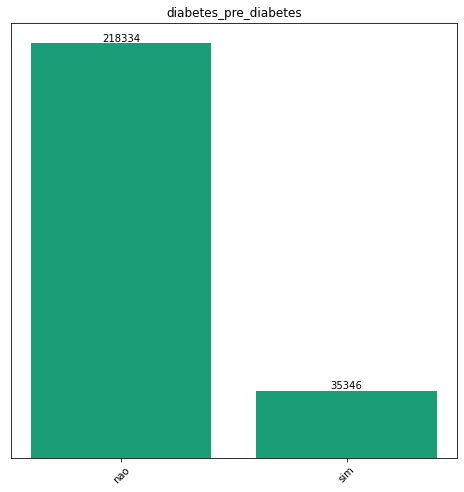

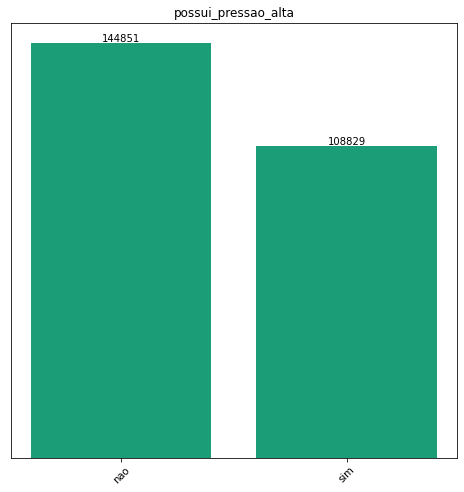

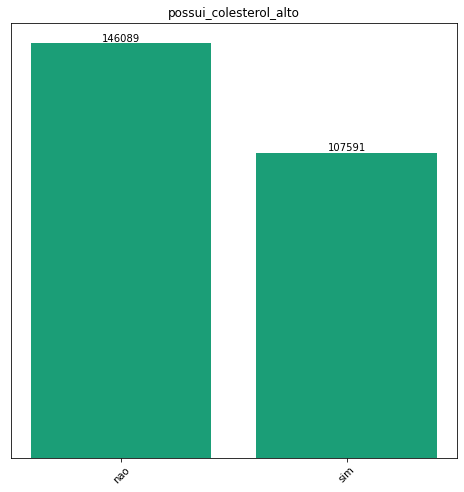

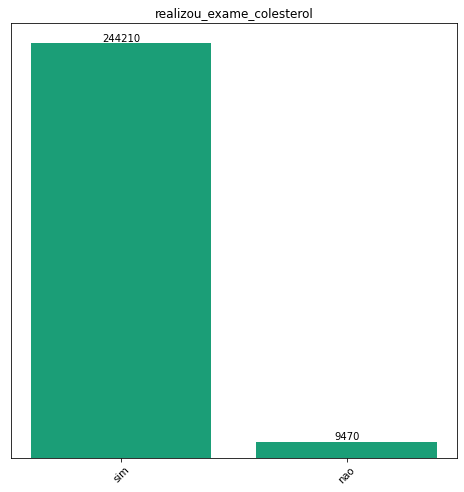

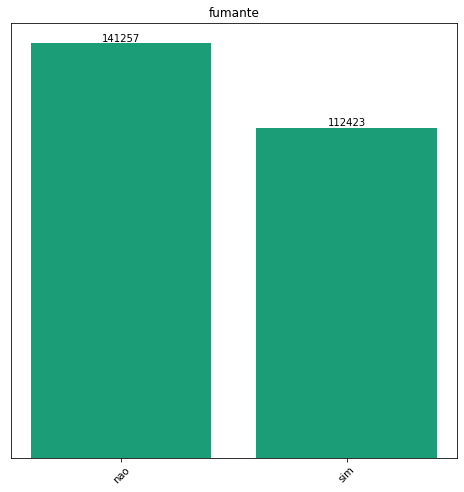

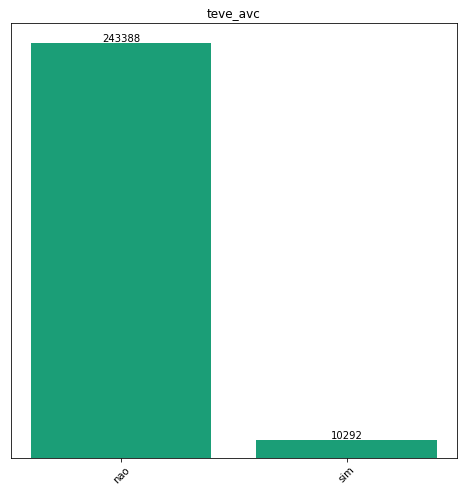

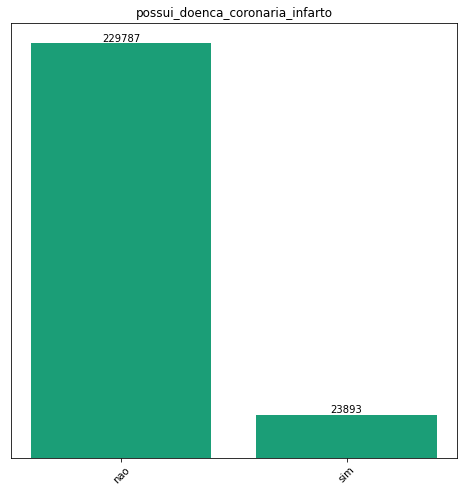

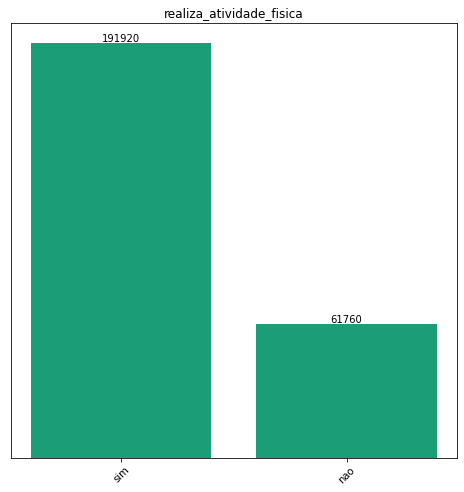

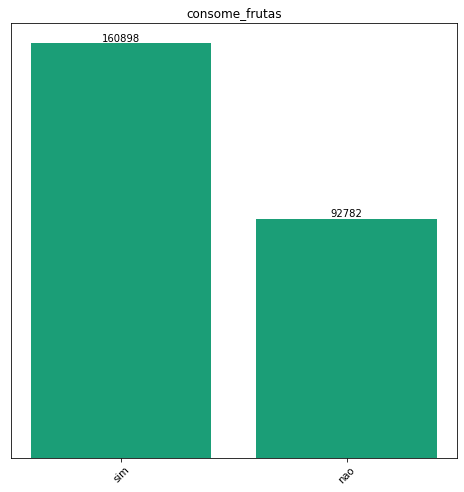

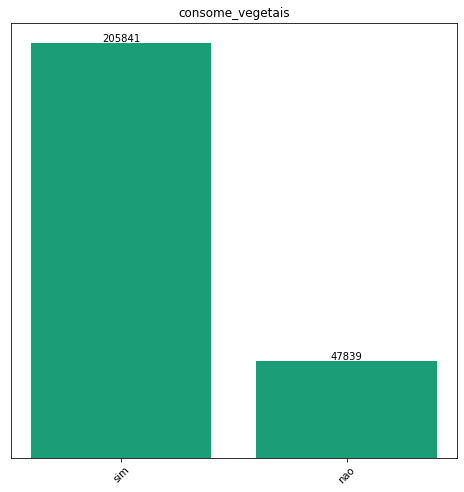

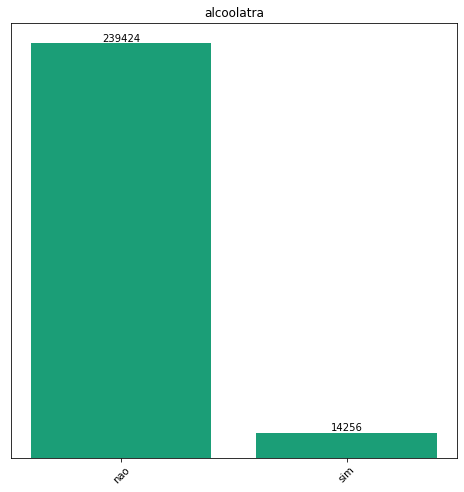

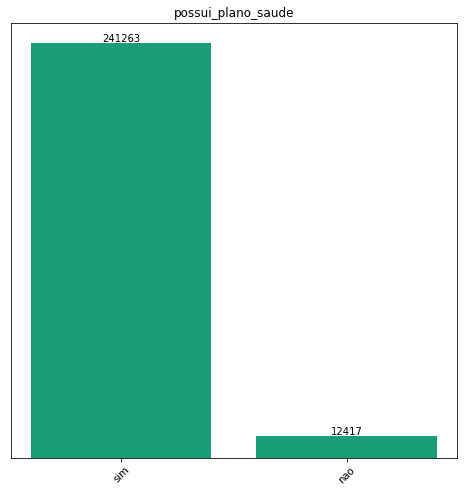

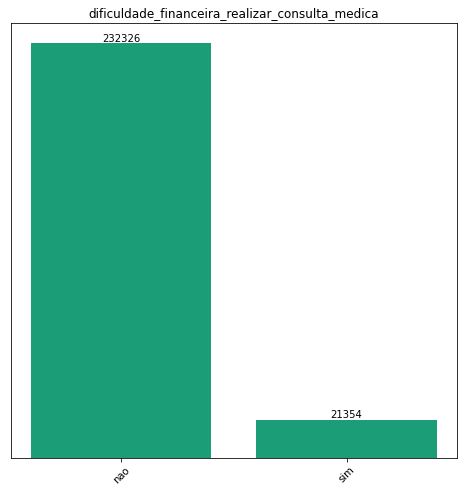

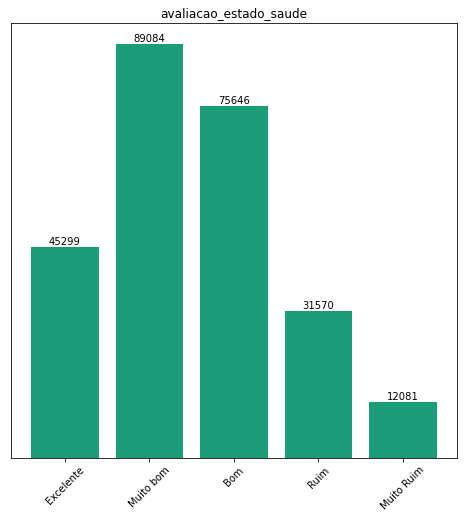

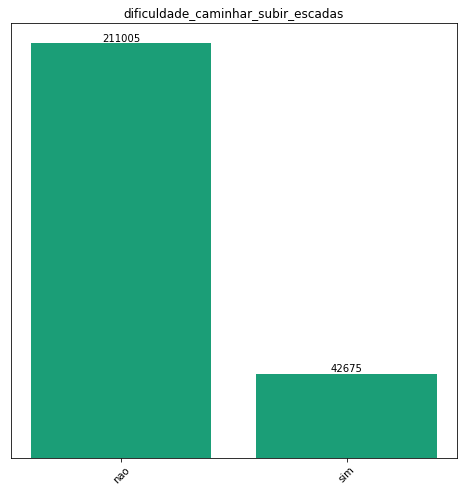

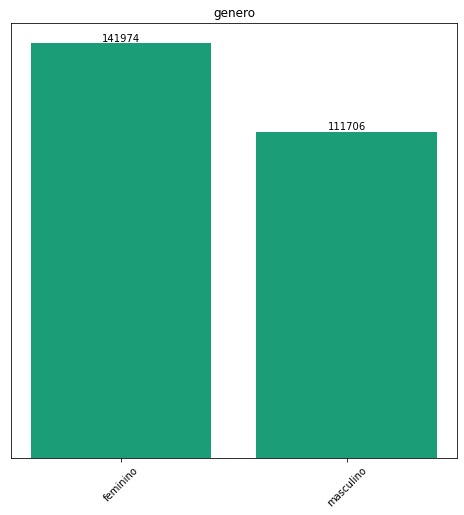

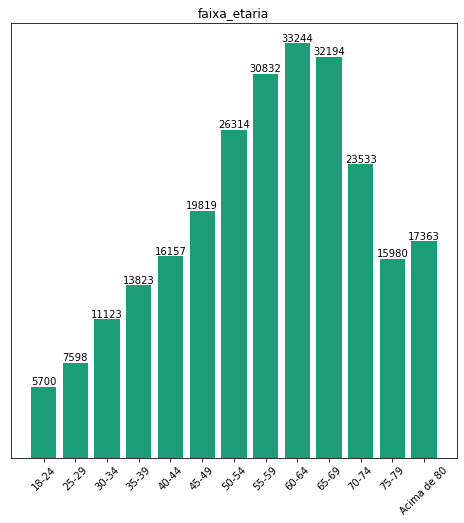

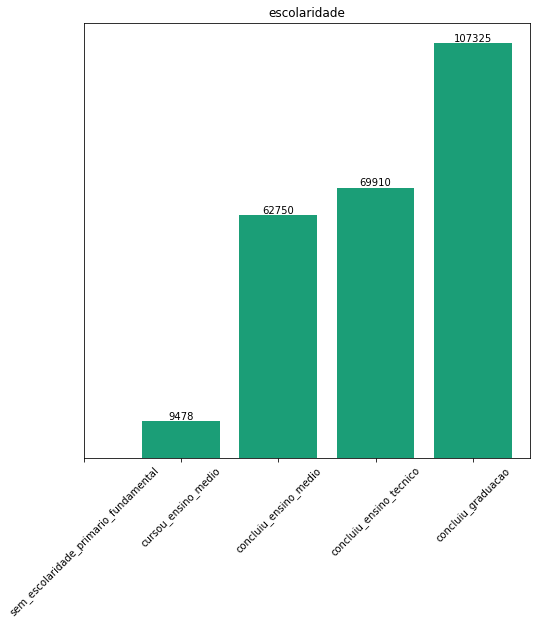

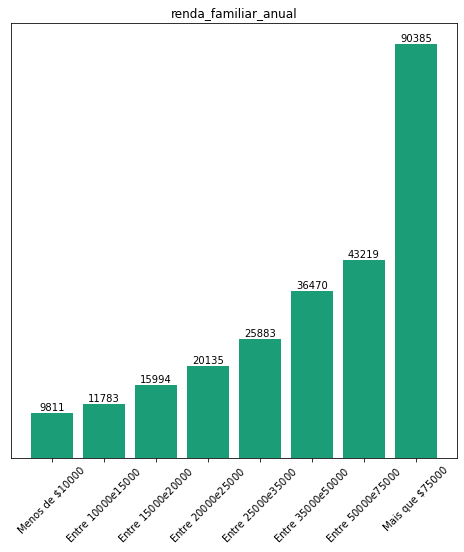

In [12]:
#Análise da distribuição dos valores das variáveis categóricas
#Vamos analisar os valores através de gráficos de barras.

cores = plt.get_cmap('Dark2').colors
for variavel in df_categoricas.columns:
    plt.figure(figsize=(8,8))
    valor = df_categoricas[variavel].value_counts()
    if(variavel == 'avaliacao_estado_saude'):
        novo_index = ['Excelente','Muito bom','Bom','Ruim','Muito Ruim']
        valor = valor.reindex(index = novo_index)
        #barra = plt.bar(valor.index, valor.values)
        #plt.bar_label(barra)
        #plt.title(variavel)
        #plt.xticks(valor.index, rotation = 45)
        #plt.yticks([])
        #plt.box(True)
        #plt.show()
    elif(variavel =='escolaridade'):
        novo_index = ['sem_escolaridade_primario_fundamental','cursou_ensino_medio','concluiu_ensino_medio','concluiu_ensino_tecnico','concluiu_graduacao']
        valor = valor.reindex(index = novo_index)
        #plt.xticks(valor.index, rotation = 15)
    elif(variavel =='renda_familiar_anual'):
        novo_index = ['Menos de $10000','Entre $10000 e $15000','Entre $15000 e $20000', 'Entre $20000 e $25000','Entre $25000 e $35000', 'Entre $35000 e $50000', 'Entre $50000 e $75000', 'Mais que $75000']
        valor = valor.reindex(index = novo_index)
        #plt.xticks(valor.index, rotation = 15)
    elif(variavel =='faixa_etaria' ):
        novo_index = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69', '70-74','75-79','Acima de 80']
        valor = valor.reindex(index = novo_index)
        barra = plt.bar(valor.index, valor.values)
    else:
        pass
    barra = plt.bar(valor.index, valor.values, color = cores[0])
    plt.bar_label(barra)
    plt.title(variavel)
    plt.xticks(valor.index, rotation = 45)
    plt.yticks([])
    plt.box(True)
    plt.show()

In [13]:
## Análise variáveis numéricas
#Vamos criar um dataset apenas para as variáveis numéricas
df_numericas = df[['imc','dias_estado_saude_mental_nao_boa','dias_estado_saude_fisica_nao_boa']]

In [14]:
##Realizando análise descritiva por meio da função describe.

df_numericas.describe()

,imc,dias_estado_saude_mental_nao_boa,dias_estado_saude_fisica_nao_boa
count,253680.000000,253680.000000,253680.000000
mean,28.382364,3.184772,4.242081
std,6.608694,7.412847,8.717951
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,98.000000,30.000000,30.000000


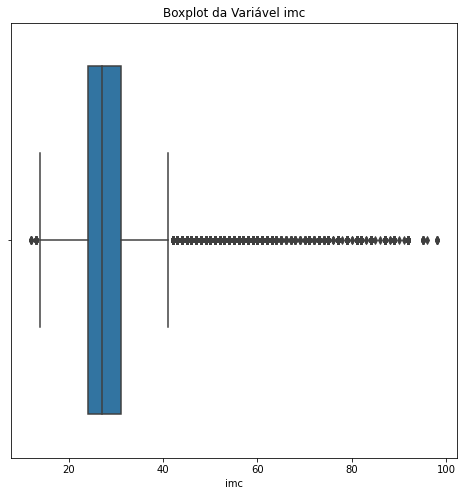

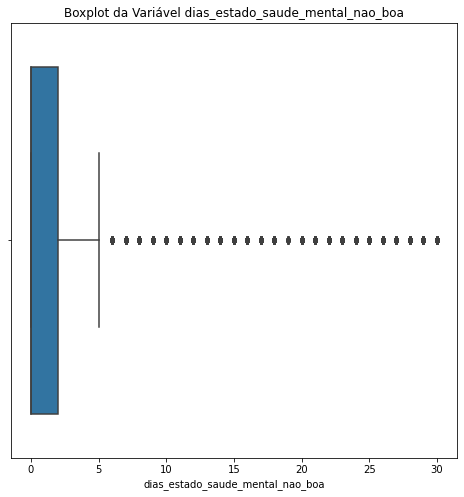

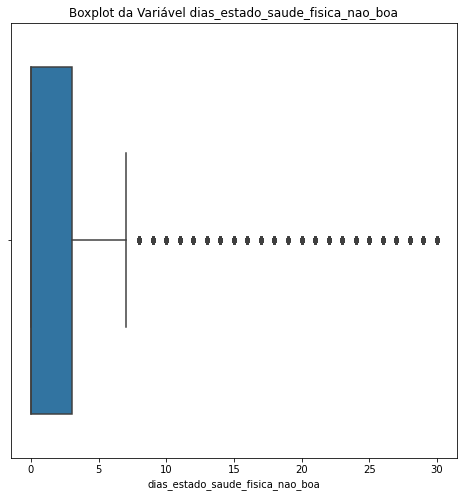

In [15]:
for numerica in df_numericas.columns:
    plt.figure(figsize = (8,8))
    sns.boxplot(data = df_numericas, x =  df_numericas[numerica])
    plt.title(f"Boxplot da Variável {numerica}")
    #plt.xticks([])
    plt.show()

#### Observando os boxplots das variáveis numéricas, uma estratégia a ser adotada e a classificação dos valores por faixa de valores, transformando em variáveis categóricas ordinais.

#### Sendo assim, para a variável 'imc', os valores serão enquadrados de acordo com as faixas estabelecidas
#### Abaixo de 18,5 - Subpeso
#### Entre 18,5 e 24,9 - Saudável
#### Entre 25,0 e 29,9 - Sobrepeso
#### Acima de 30 - Obesidade

#### Para as variáveis dias_estado_saude_mental_nao_boa e dias_estado_saude_fisica_nao_boa, vamos agrupar por faixas:
#### Nenhum 
#### 1- 5
#### Acima de 5

In [16]:
#tratamento variável imc
for i,valor in enumerate(df['imc']):
    if(valor < 18.5):
        df['imc'][i] = 'subpeso'
    elif(valor >= 18.5 and valor <25):
        df['imc'][i] = 'saudavel'
    elif(valor >=25 and valor <30):
        df['imc'][i] = 'sobrepeso'
    else:
        df['imc'][i] = 'obesidade'

C:\Users\GUILHE~1\AppData\Local\Temp/ipykernel_13780/2011784905.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['imc'][i] = 'obesidade'
C:\Users\GUILHE~1\AppData\Local\Temp/ipykernel_13780/2011784905.py:10: SettingWithCopyWarning: 
A

In [17]:
## Tratamento variável dias_estado_saude_mental_nao_boa
for i, valor in enumerate(df['dias_estado_saude_mental_nao_boa']):
    if(valor == 0):
        df['dias_estado_saude_mental_nao_boa'][i] = 'Nenhum'
    elif(valor >0 and valor <=5):
        df['dias_estado_saude_mental_nao_boa'][i] = '1-5'
    else:
        df['dias_estado_saude_mental_nao_boa'][i] = 'Acima de 5'

C:\Users\GUILHE~1\AppData\Local\Temp/ipykernel_13780/4240259491.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['dias_estado_saude_mental_nao_boa'][i] = 'Acima de 5'
C:\Users\GUILHE~1\AppData\Local\Temp/ipykernel_13780/4240259491.py:8

In [18]:
## Tratamento variável dias_estado_saude_fisica_nao_boa
for i, valor in enumerate(df['dias_estado_saude_fisica_nao_boa']):
    if(valor == 0):
        df['dias_estado_saude_fisica_nao_boa'][i] = 'Nenhum'
    elif(valor >0 and valor <=5):
        df['dias_estado_saude_fisica_nao_boa'][i] = '1-5'
    else:
        df['dias_estado_saude_fisica_nao_boa'][i] = 'Acima de 5'

C:\Users\GUILHE~1\AppData\Local\Temp/ipykernel_13780/2426195141.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['dias_estado_saude_fisica_nao_boa'][i] = 'Acima de 5'
C:\Users\GUILHE~1\AppData\Local\Temp/ipykernel_13780/2426195141.py:8

In [19]:
##Observando os valores das variáveis numéricas que se tornaram categóricas

num_cat = ['imc','dias_estado_saude_mental_nao_boa','dias_estado_saude_fisica_nao_boa']
for i in range(len(num_cat)):
    #print(num_cat[i])
    print(df[num_cat[i]].value_counts())
    print('\n')

imc
sobrepeso    93749
obesidade    87851
saudavel     68953
subpeso       3127
Name: count, dtype: int64


dias_estado_saude_mental_nao_boa
Nenhum        175680
1-5            41792
Acima de 5     36208
Name: count, dtype: int64


dias_estado_saude_fisica_nao_boa
Nenhum        160052
Acima de 5     46817
1-5            46811
Name: count, dtype: int64




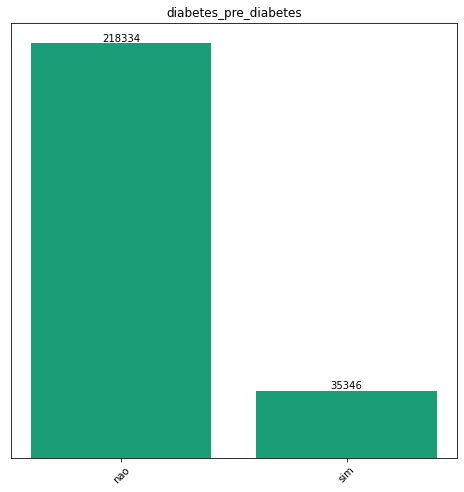

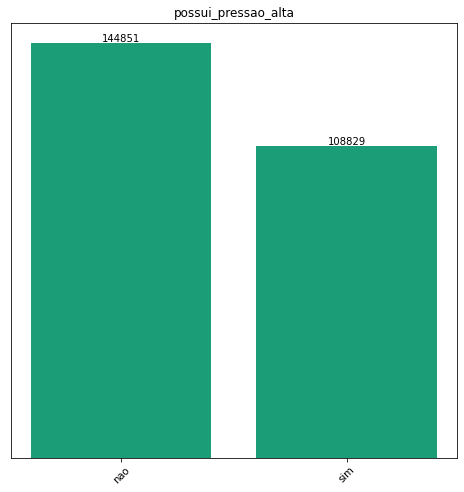

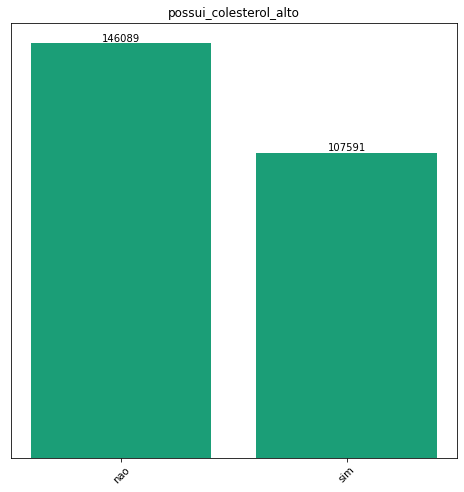

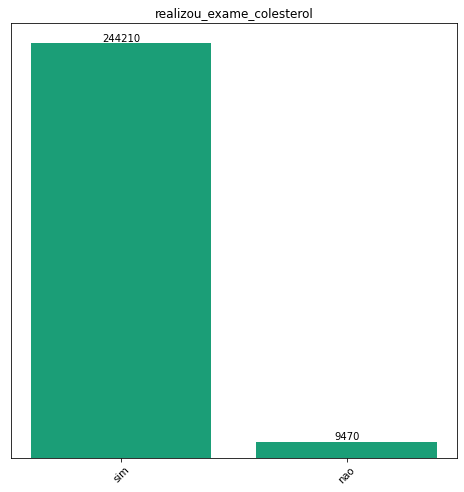

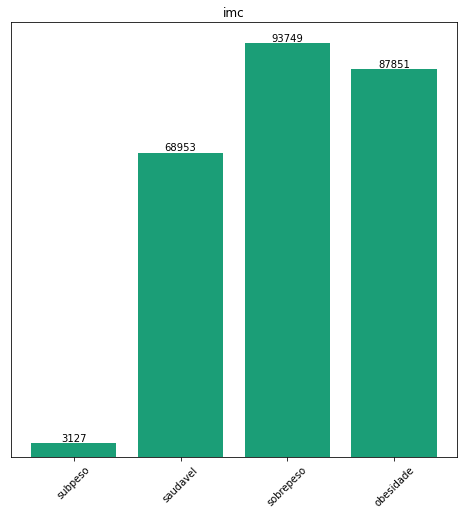

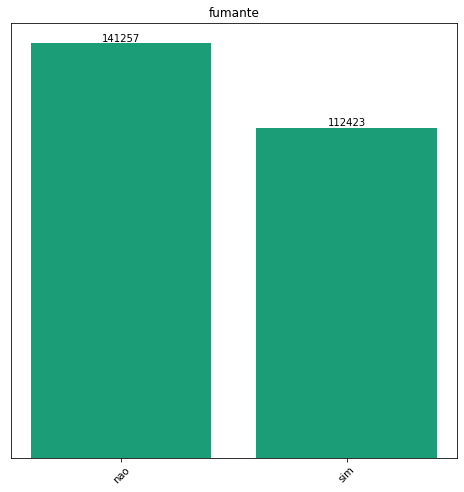

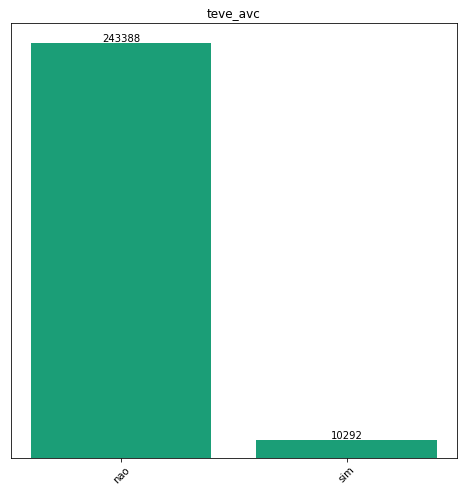

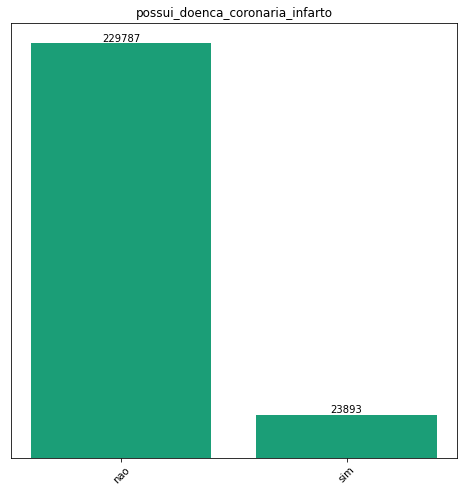

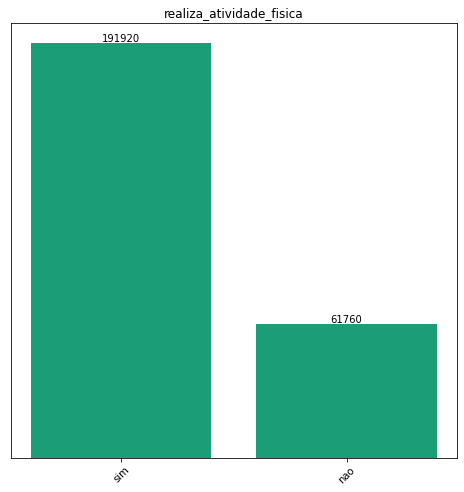

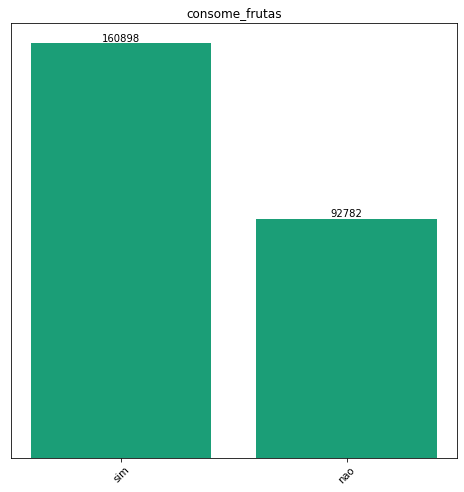

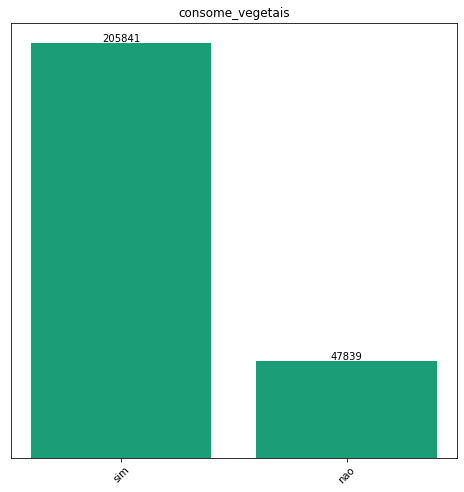

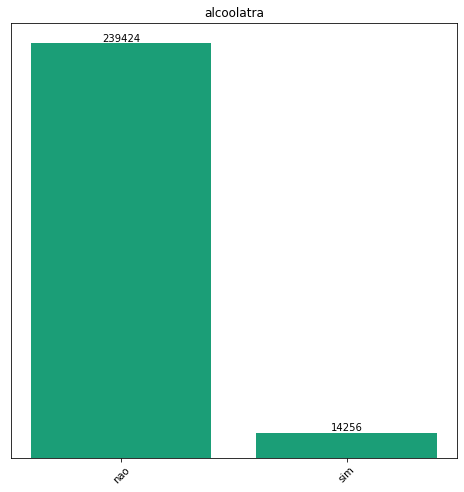

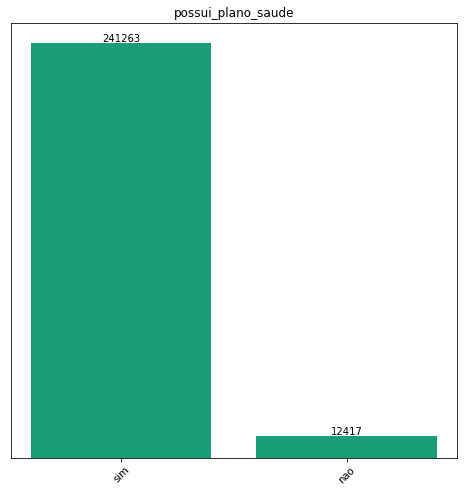

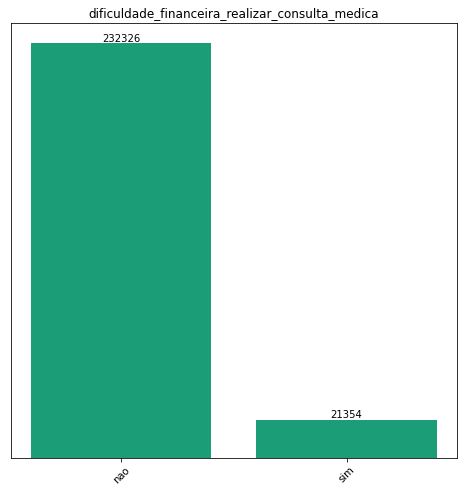

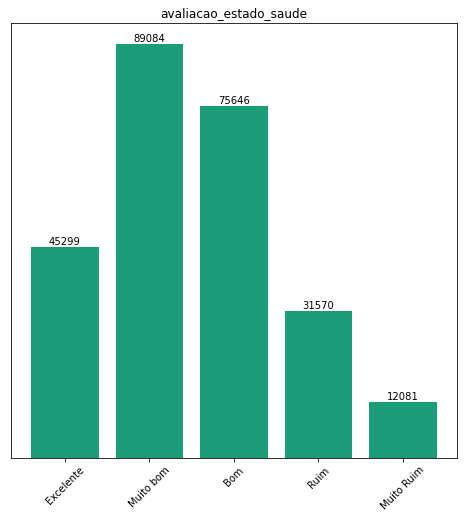

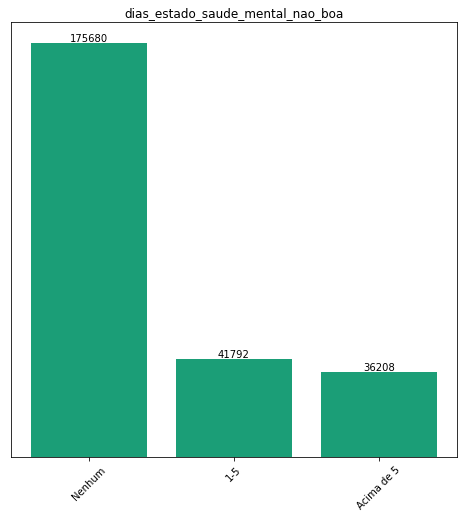

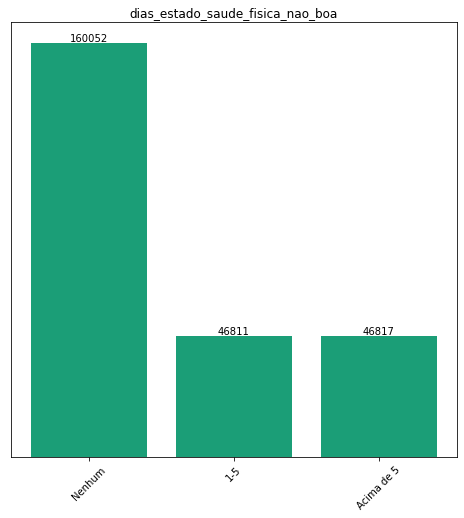

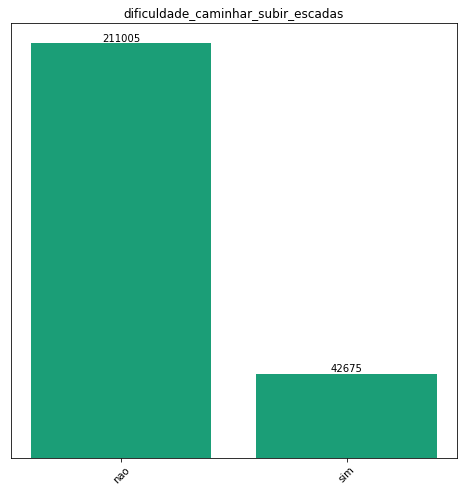

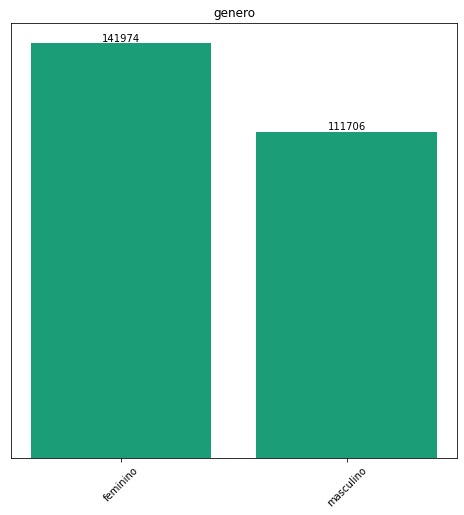

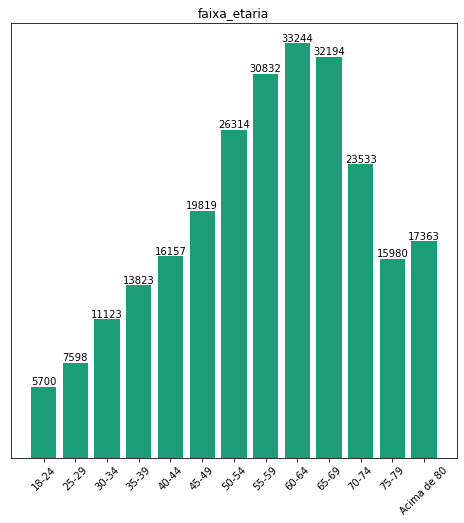

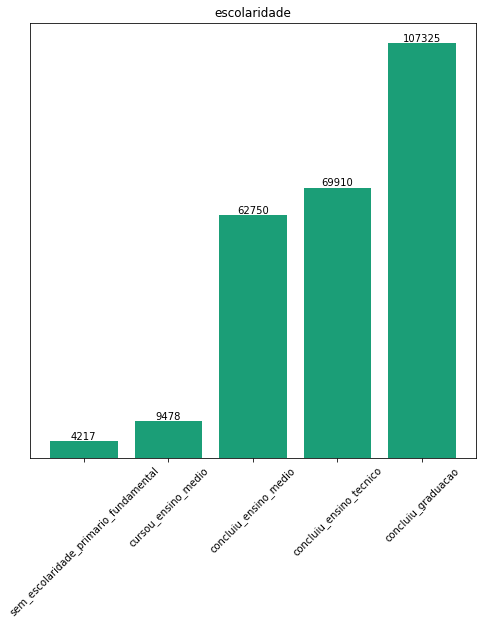

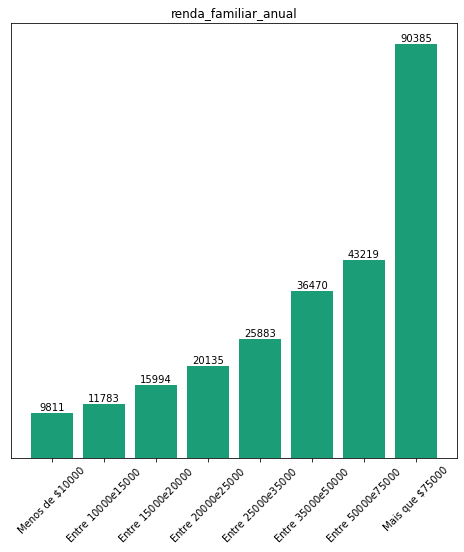

In [20]:
##Analisando todas as variáveis do dataset
#Análise da distribuição dos valores das variáveis categóricas
#Vamos analisar os valores através de gráficos de barras.

cores = plt.get_cmap('Dark2').colors
for variavel in df.columns:
    plt.figure(figsize=(8,8))
    valor = df[variavel].value_counts()
    if(variavel == 'avaliacao_estado_saude'):
        novo_index = ['Excelente','Muito bom','Bom','Ruim','Muito Ruim']
        valor = valor.reindex(index = novo_index)
    elif(variavel =='escolaridade'):
        novo_index = ['sem_escolaridade_primario_fundamental','cursou_ensino_medio','concluiu_ensino_medio','concluiu_ensino_tecnico','concluiu_graduacao']
        valor = valor.reindex(index = novo_index)
    elif(variavel =='renda_familiar_anual'):
        novo_index = ['Menos de $10000','Entre $10000 e $15000','Entre $15000 e $20000', 'Entre $20000 e $25000','Entre $25000 e $35000', 'Entre $35000 e $50000', 'Entre $50000 e $75000', 'Mais que $75000']
        valor = valor.reindex(index = novo_index)
    elif(variavel =='faixa_etaria' ):
        novo_index = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69', '70-74','75-79','Acima de 80']
        valor = valor.reindex(index = novo_index)
        barra = plt.bar(valor.index, valor.values)
    elif(variavel =='dias_estado_saude_fisica_nao_boa' ):
        novo_index = ['Nenhum','1-5','Acima de 5']
        valor = valor.reindex(index = novo_index)
        barra = plt.bar(valor.index, valor.values)
    elif(variavel =='imc' ):
        novo_index = ['subpeso','saudavel','sobrepeso','obesidade']
        valor = valor.reindex(index = novo_index)
        barra = plt.bar(valor.index, valor.values)
    else:
        pass
    barra = plt.bar(valor.index, valor.values, color = cores[0])
    plt.bar_label(barra)
    plt.title(variavel)
    plt.xticks(valor.index, rotation = 45)
    plt.yticks([])
    plt.box(True)
    plt.show()

## Etapa de Transformação
### Nessa etapa, será realizada a seleção das variáveis que possuem relação com a variável alvo, bem como a separação do conjunto de dados de treino e teste.

### Como as variáveis no dataset estão representadas como variáveis categóricas, vamos realizar o teste do Chi-Quadrado para avaliar a relação das variáveis com a variável alvo.

In [21]:
##Variáveis independentes
X_chi = df.drop(['diabetes_pre_diabetes'], axis = 1)

###Variável dependente
Y_chi = df['diabetes_pre_diabetes']

In [22]:
label_encoder = LabelEncoder()
for coluna in X_chi:
    X_chi[coluna] = label_encoder.fit_transform(X_chi[coluna])

In [23]:
X_chi.head()

,possui_pressao_alta,possui_colesterol_alto,realizou_exame_colesterol,imc,fumante,teve_avc,possui_doenca_coronaria_infarto,realiza_atividade_fisica,consome_frutas,consome_vegetais,...,possui_plano_saude,dificuldade_financeira_realizar_consulta_medica,avaliacao_estado_saude,dias_estado_saude_mental_nao_boa,dias_estado_saude_fisica_nao_boa,dificuldade_caminhar_subir_escadas,genero,faixa_etaria,escolaridade,renda_familiar_anual
0,1,1,1,0,1,0,0,0,0,1,...,1,0,2,1,1,1,0,8,0,1
1,0,0,0,2,1,0,0,1,0,0,...,0,1,0,2,2,0,0,6,2,7
2,1,1,1,2,0,0,0,0,1,0,...,1,1,2,1,1,1,0,8,0,6
3,1,0,1,2,0,0,0,1,1,1,...,1,0,3,2,2,0,0,10,3,4
4,1,1,1,1,0,0,0,1,1,1,...,1,0,3,0,2,0,0,10,1,2


In [24]:
chi_scores = chi2(X_chi,Y_chi)

<AxesSubplot:>

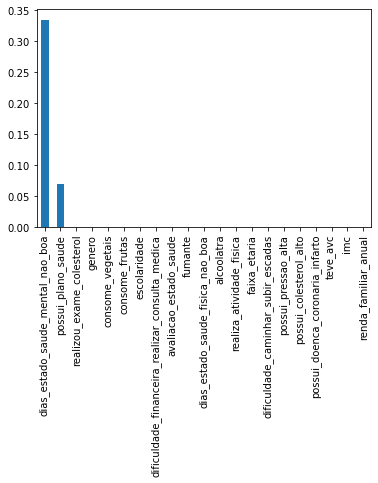

In [25]:
p_values = pd.Series(chi_scores[1],index = X_chi.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [26]:
print(p_values)

dias_estado_saude_mental_nao_boa                    3.345923e-01
possui_plano_saude                                  7.008884e-02
realizou_exame_colesterol                           2.935854e-10
genero                                              2.349212e-32
consome_vegetais                                    3.517963e-35
consome_frutas                                      2.000073e-35
escolaridade                                        2.291341e-51
dificuldade_financeira_realizar_consulta_medica     7.501278e-52
avaliacao_estado_saude                              1.887474e-67
fumante                                            1.570423e-115
dias_estado_saude_fisica_nao_boa                   3.896701e-158
alcoolatra                                         1.605281e-171
realiza_atividade_fisica                           1.893271e-189
faixa_etaria                                        0.000000e+00
dificuldade_caminhar_subir_escadas                  0.000000e+00
possui_pressao_alta      

### Como os valores de p-value das variáveis dias_estado_saude_mental_nao_boa e possui_plano_saude são acima de 0,05(nível de significância), vamos rejeitar a hipótese nula e considerar que a variável alvo não possui relação com essas variáveis. 

In [27]:
#Removendo as variáveis do dataset
df = df.drop(['dias_estado_saude_mental_nao_boa','possui_plano_saude'], axis=1)

In [28]:
## Como existe a variável possui colesterol alto e a variável realizou exame de colesterol, as duas variáveis podem ser consideradas correlacionadas, pois para saber o nível de colesterol, é necessário realizar o exame, logo a variável possui colesterol alto é resultado da variável realizou exame colesterol, dessa forma, iremos retirar do dataset a variável sobre exame de colesterol.
df = df.drop(['realizou_exame_colesterol'], axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 19 columns):
 #   Column                                           Non-Null Count   Dtype 
---  ------                                           --------------   ----- 
 0   diabetes_pre_diabetes                            253680 non-null  object
 1   possui_pressao_alta                              253680 non-null  object
 2   possui_colesterol_alto                           253680 non-null  object
 3   imc                                              253680 non-null  object
 4   fumante                                          253680 non-null  object
 5   teve_avc                                         253680 non-null  object
 6   possui_doenca_coronaria_infarto                  253680 non-null  object
 7   realiza_atividade_fisica                         253680 non-null  object
 8   consome_frutas                                   253680 non-null  object
 9   consome_vegetais          

In [30]:
#Separando o df em variáveis independentes e dependentes
X = df.drop(['diabetes_pre_diabetes'], axis = 1)
y = df['diabetes_pre_diabetes']

In [31]:
X.tail()

,possui_pressao_alta,possui_colesterol_alto,imc,fumante,teve_avc,possui_doenca_coronaria_infarto,realiza_atividade_fisica,consome_frutas,consome_vegetais,alcoolatra,dificuldade_financeira_realizar_consulta_medica,avaliacao_estado_saude,dias_estado_saude_fisica_nao_boa,dificuldade_caminhar_subir_escadas,genero,faixa_etaria,escolaridade,renda_familiar_anual
253675,sim,sim,obesidade,nao,nao,nao,nao,sim,sim,nao,nao,Bom,1-5,nao,masculino,40-44,concluiu_graduacao,Entre $50000 e $75000
253676,sim,sim,subpeso,nao,nao,nao,nao,nao,nao,nao,nao,Ruim,Nenhum,sim,feminino,70-74,sem_escolaridade_primario_fundamental,Entre $20000 e $25000
253677,nao,nao,sobrepeso,nao,nao,nao,sim,sim,nao,nao,nao,Excelente,Nenhum,nao,feminino,25-29,concluiu_ensino_tecnico,Entre $10000 e $15000
253678,sim,nao,saudavel,nao,nao,nao,nao,sim,sim,nao,nao,Bom,Nenhum,nao,masculino,50-54,concluiu_ensino_tecnico,Menos de $10000
253679,sim,sim,sobrepeso,nao,nao,sim,sim,sim,nao,nao,nao,Muito bom,Nenhum,nao,feminino,60-64,concluiu_graduacao,Entre $10000 e $15000


In [32]:
y.tail()

253675    nao
253676    sim
253677    nao
253678    nao
253679    sim
Name: diabetes_pre_diabetes, dtype: object

### Separando o conjunto de treino e teste. 
### 70% Treino e 30% Teste.

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [34]:
y_train.value_counts()

diabetes_pre_diabetes
nao    152819
sim     24757
Name: count, dtype: int64

###  Binarizando as variáveis de treino.

In [35]:
X_train = pd.get_dummies(X_train,drop_first = True)

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177576 entries, 97673 to 145172
Data columns (total 44 columns):
 #   Column                                               Non-Null Count   Dtype
---  ------                                               --------------   -----
 0   possui_pressao_alta_sim                              177576 non-null  bool 
 1   possui_colesterol_alto_sim                           177576 non-null  bool 
 2   imc_saudavel                                         177576 non-null  bool 
 3   imc_sobrepeso                                        177576 non-null  bool 
 4   imc_subpeso                                          177576 non-null  bool 
 5   fumante_sim                                          177576 non-null  bool 
 6   teve_avc_sim                                         177576 non-null  bool 
 7   possui_doenca_coronaria_infarto_sim                  177576 non-null  bool 
 8   realiza_atividade_fisica_sim                         177576 non-null  bool 

In [37]:
X_train.head()

,possui_pressao_alta_sim,possui_colesterol_alto_sim,imc_saudavel,imc_sobrepeso,imc_subpeso,fumante_sim,teve_avc_sim,possui_doenca_coronaria_infarto_sim,realiza_atividade_fisica_sim,consome_frutas_sim,...,escolaridade_concluiu_graduacao,escolaridade_cursou_ensino_medio,escolaridade_sem_escolaridade_primario_fundamental,renda_familiar_anual_Entre $15000 e $20000,renda_familiar_anual_Entre $20000 e $25000,renda_familiar_anual_Entre $25000 e $35000,renda_familiar_anual_Entre $35000 e $50000,renda_familiar_anual_Entre $50000 e $75000,renda_familiar_anual_Mais que $75000,renda_familiar_anual_Menos de $10000
97673,True,True,True,False,False,True,False,False,True,True,...,True,False,False,False,False,False,False,False,True,False
231416,False,False,True,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
110706,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
45847,True,True,True,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
68039,False,False,False,True,False,False,False,True,True,True,...,True,False,False,False,False,False,False,True,False,False


## Binarizando as variáveis de Teste

In [38]:
X_test = pd.get_dummies(X_test,drop_first = True)

In [39]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76104 entries, 27344 to 216326
Data columns (total 44 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   possui_pressao_alta_sim                              76104 non-null  bool 
 1   possui_colesterol_alto_sim                           76104 non-null  bool 
 2   imc_saudavel                                         76104 non-null  bool 
 3   imc_sobrepeso                                        76104 non-null  bool 
 4   imc_subpeso                                          76104 non-null  bool 
 5   fumante_sim                                          76104 non-null  bool 
 6   teve_avc_sim                                         76104 non-null  bool 
 7   possui_doenca_coronaria_infarto_sim                  76104 non-null  bool 
 8   realiza_atividade_fisica_sim                         76104 non-null  bool 
 9   consom

In [40]:
y_test.value_counts()

diabetes_pre_diabetes
nao    65515
sim    10589
Name: count, dtype: int64

In [41]:
X_test.head()

,possui_pressao_alta_sim,possui_colesterol_alto_sim,imc_saudavel,imc_sobrepeso,imc_subpeso,fumante_sim,teve_avc_sim,possui_doenca_coronaria_infarto_sim,realiza_atividade_fisica_sim,consome_frutas_sim,...,escolaridade_concluiu_graduacao,escolaridade_cursou_ensino_medio,escolaridade_sem_escolaridade_primario_fundamental,renda_familiar_anual_Entre $15000 e $20000,renda_familiar_anual_Entre $20000 e $25000,renda_familiar_anual_Entre $25000 e $35000,renda_familiar_anual_Entre $35000 e $50000,renda_familiar_anual_Entre $50000 e $75000,renda_familiar_anual_Mais que $75000,renda_familiar_anual_Menos de $10000
27344,False,True,False,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
250200,True,True,False,True,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,False,False
87887,False,True,False,False,False,True,False,False,True,True,...,True,False,False,False,False,False,False,True,False,False
150355,False,False,True,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,True,False
160872,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [42]:
##Resetando os index do conjunto de treio e teste
X_test.reset_index(inplace = True)
X_train.reset_index(inplace = True)

X_train.drop(columns = 'index', inplace = True)
X_test.drop(columns = 'index', inplace = True)

In [43]:
X_test.head()

,possui_pressao_alta_sim,possui_colesterol_alto_sim,imc_saudavel,imc_sobrepeso,imc_subpeso,fumante_sim,teve_avc_sim,possui_doenca_coronaria_infarto_sim,realiza_atividade_fisica_sim,consome_frutas_sim,...,escolaridade_concluiu_graduacao,escolaridade_cursou_ensino_medio,escolaridade_sem_escolaridade_primario_fundamental,renda_familiar_anual_Entre $15000 e $20000,renda_familiar_anual_Entre $20000 e $25000,renda_familiar_anual_Entre $25000 e $35000,renda_familiar_anual_Entre $35000 e $50000,renda_familiar_anual_Entre $50000 e $75000,renda_familiar_anual_Mais que $75000,renda_familiar_anual_Menos de $10000
0,False,True,False,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,True,True,False,True,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,False,False
2,False,True,False,False,False,True,False,False,True,True,...,True,False,False,False,False,False,False,True,False,False
3,False,False,True,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,True,False
4,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [44]:
X_train.head()

,possui_pressao_alta_sim,possui_colesterol_alto_sim,imc_saudavel,imc_sobrepeso,imc_subpeso,fumante_sim,teve_avc_sim,possui_doenca_coronaria_infarto_sim,realiza_atividade_fisica_sim,consome_frutas_sim,...,escolaridade_concluiu_graduacao,escolaridade_cursou_ensino_medio,escolaridade_sem_escolaridade_primario_fundamental,renda_familiar_anual_Entre $15000 e $20000,renda_familiar_anual_Entre $20000 e $25000,renda_familiar_anual_Entre $25000 e $35000,renda_familiar_anual_Entre $35000 e $50000,renda_familiar_anual_Entre $50000 e $75000,renda_familiar_anual_Mais que $75000,renda_familiar_anual_Menos de $10000
0,True,True,True,False,False,True,False,False,True,True,...,True,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
2,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,True,True,True,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,True,False,False,False,True,True,True,...,True,False,False,False,False,False,False,True,False,False


## Etapa de Mineração de Dados
### Nessa etapa, vamos aplicar modelos de Machine Learning e avaliar o seu desempenho.
### Os modelos aplicados serão:
### Floresta Aleatória, Regressão Logística, Rede Neural (MLP Classifier) e XGboost

## Primeira Abordagem
### Aplicação dos modelos com os parâmetros padrões e sem nenhum tipo de balancemaneto de classe.

### Floresta Aleatória

In [45]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print('/n')
print(classification_report(y_test, y_pred_rf))

[[62933  2582]
 [ 8742  1847]]
/n
              precision    recall  f1-score   support

         nao       0.88      0.96      0.92     65515
         sim       0.42      0.17      0.25     10589

    accuracy                           0.85     76104
   macro avg       0.65      0.57      0.58     76104
weighted avg       0.81      0.85      0.82     76104



### Regressão Logística

In [46]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr))
print('')
print(classification_report(y_test, y_pred_lr))

[[64169  1346]
 [ 8955  1634]]

              precision    recall  f1-score   support

         nao       0.88      0.98      0.93     65515
         sim       0.55      0.15      0.24     10589

    accuracy                           0.86     76104
   macro avg       0.71      0.57      0.58     76104
weighted avg       0.83      0.86      0.83     76104



### XGBoost

In [47]:
#Método XGBOOST
y_test_xb = y_test.replace({'nao': 0, 'sim': 1})
y_train_xb = y_train.replace({'nao': 0, 'sim': 1})

xgb = XGBClassifier()
xgb.fit(X_train,y_train_xb)
y_pred_xgb = xgb.predict(X_test)
print(confusion_matrix(y_test_xb, y_pred_xgb))
print('')
print(classification_report(y_test_xb, y_pred_xgb))

C:\Users\GUILHE~1\AppData\Local\Temp/ipykernel_13780/2159063864.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_xb = y_test.replace({'nao': 0, 'sim': 1})
C:\Users\GUILHE~1\AppData\Local\Temp/ipykernel_13780/2159063864.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_xb = y_train.replace({'nao': 0, 'sim': 1})


[[64033  1482]
 [ 8931  1658]]

              precision    recall  f1-score   support

           0       0.88      0.98      0.92     65515
           1       0.53      0.16      0.24     10589

    accuracy                           0.86     76104
   macro avg       0.70      0.57      0.58     76104
weighted avg       0.83      0.86      0.83     76104



### Redes Neurais (MLP Classifier)

In [48]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)
print(confusion_matrix(y_test, y_pred_mlp))
print('')
print(classification_report(y_test, y_pred_mlp))

[[63135  2380]
 [ 8390  2199]]

              precision    recall  f1-score   support

         nao       0.88      0.96      0.92     65515
         sim       0.48      0.21      0.29     10589

    accuracy                           0.86     76104
   macro avg       0.68      0.59      0.61     76104
weighted avg       0.83      0.86      0.83     76104



### O Desempenho abaixo do esperado dos modelos, principalmente no recall para a classe menos favorecida (diabéticos), pode ser explicada pelo número bem maior de instâncias de não diabéticos que de diabéticos no conjunto de treino e por nenhuma técnica de hiperparâmetro ter sido utilzada.
### Dessa forma, vamos utilizar a técnica de balanceamento de classes por undersampling, onde registros de não diabéticos serão excluídos do conjunto de treino até o número de registros de diabéticos ser equivalente a 90% do total de registros de não diabéticos.
### Com esse conjunto, iremos aplicar técnicas de busca pelos melhores hiperparâmetros buscando aumentar o f1-score e utilizando um conjunto de validação que corresponde a  20% do conjunto de treino (cv = 5).

In [49]:
# Deixando o conjunto de teste com a amostra menos favorecida (diabéticos) correspondendo a 90% da amostra favorecida.
under = under_sampling.RandomUnderSampler(sampling_strategy=0.9)
X_under, y_under = under.fit_resample(X_train, y_train)
y_under.value_counts()

diabetes_pre_diabetes
nao    27507
sim    24757
Name: count, dtype: int64

In [50]:
#Score a ser buscado: maior f1 score
scorer = make_scorer(f1_score, average = 'weighted')

### Hiperparâmetros Floresta Aleatória

In [51]:
parametros_rf = {'n_estimators': [10, 10, 300], 'max_features': ['sqrt', 'log2'],'max_depth': [50,100,250,500],
                'class_weight':['balanced','balanced_subsample']}
rf_f1 = RandomForestClassifier()
grid_search_rf_under = GridSearchCV(rf_f1, parametros_rf, cv= 5, scoring = scorer)
grid_search_rf_under.fit(X_under,y_under)
print(grid_search_rf_under.best_params_)
print(grid_search_rf_under.best_score_)
resultados_rf_under = pd.DataFrame(grid_search_rf_under.cv_results_)
best_grid_rf = pd.Series(grid_search_rf_under.best_params_)

{'class_weight': 'balanced', 'max_depth': 50, 'max_features': 'log2', 'n_estimators': 300}
0.7229068579832065


### Hiperparâmetros Regressão Logística

In [52]:
#recall_scorer = make_scorer(recall_score, pos_label=valor_alvo)
parametros_lr = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga'], 'max_iter': [50,100,250],
                'class_weight': ['None','balanced']}
lr_f1 = LogisticRegression(class_weight = 'balanced')
scorer = make_scorer(f1_score, average = 'weighted')
grid_search_lr_under = GridSearchCV(lr_f1, parametros_lr, cv= 5, scoring = scorer)
grid_search_lr_under.fit(X_under,y_under)
print(grid_search_lr_under.best_params_)
print(grid_search_lr_under.best_score_)
best_grid_lr = pd.Series(grid_search_lr_under.best_params_)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Guilhe

{'C': 1, 'class_weight': 'balanced', 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}
0.7455963893886333


### Hiperparâmetros Redes Neurais

In [53]:
parametros_mlp = {'hidden_layer_sizes': [100, 200, 300], 'activation': ['identity', 'logistic', 'tanh', 'relu']}
mlp_f1 = MLPClassifier()
grid_search_mlp_under = GridSearchCV(mlp_f1, parametros_mlp, cv= 5, scoring = scorer)
grid_search_mlp_under.fit(X_under,y_under)
print(grid_search_mlp_under.best_params_)
print(grid_search_mlp_under.best_score_)
resultados_mlp_under = pd.DataFrame(grid_search_mlp_under.cv_results_)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\n

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\n

{'activation': 'logistic', 'hidden_layer_sizes': 100}
0.7464241899260673


C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
best_grid_mlp = pd.Series(grid_search_mlp_under.best_params_)

In [55]:
print(best_grid_mlp)

activation            logistic
hidden_layer_sizes         100
dtype: object


### Hiperparâmetros XGBoost

In [56]:
y_train_xb_under = y_under.replace({'nao': 0, 'sim': 1})
parametros_xgb = {'booster': ['gbtree','gblinear','dart'], 'scale_pos_weight': [1,5,10,20]}
xgb_f1 = XGBClassifier()
grid_search_xgb_under = GridSearchCV(xgb_f1, parametros_xgb, cv= 5, scoring = scorer)
grid_search_xgb_under.fit(X_under,y_train_xb_under)
print(grid_search_xgb_under.best_params_)
print(grid_search_xgb_under.best_score_)
resultados_xgb_under = pd.DataFrame(grid_search_xgb_under.cv_results_)

C:\Users\GUILHE~1\AppData\Local\Temp/ipykernel_13780/885370328.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_xb_under = y_under.replace({'nao': 0, 'sim': 1})


{'booster': 'gblinear', 'scale_pos_weight': 1}
0.7453269126588336


In [57]:
best_grid_xgb = pd.Series(grid_search_xgb_under.best_params_)

In [58]:
print(best_grid_xgb)

booster             gblinear
scale_pos_weight           1
dtype: object


## Aplicação dos melhores Hiperparâmetros em cada Modelo.
### Utilizaremos os hiperparâmetros obtidos em cada modelo e aplicaremos levando em consideração o conjunto de treino obtido pelo undersampling.

### Floresta Aleatória

In [59]:
rf = RandomForestClassifier(class_weight= best_grid_rf[0], max_depth= best_grid_rf[1],
                                  max_features= best_grid_rf[2], n_estimators= best_grid_rf[3])
rf.fit(X_under,y_under)
y_pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print('')
print(classification_report(y_test, y_pred_rf))

C:\Users\GUILHE~1\AppData\Local\Temp/ipykernel_13780/3828783451.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rf = RandomForestClassifier(class_weight= best_grid_rf[0], max_depth= best_grid_rf[1],
C:\Users\GUILHE~1\AppData\Local\Temp/ipykernel_13780/3828783451.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_features= best_grid_rf[2], n_estimators= best_grid_rf[3])


[[46306 19209]
 [ 2762  7827]]

              precision    recall  f1-score   support

         nao       0.94      0.71      0.81     65515
         sim       0.29      0.74      0.42     10589

    accuracy                           0.71     76104
   macro avg       0.62      0.72      0.61     76104
weighted avg       0.85      0.71      0.75     76104



### Regressão Logística

In [60]:
lr = LogisticRegression(C= best_grid_lr[0], max_iter= best_grid_lr[2],
                              penalty =best_grid_lr[3], solver= best_grid_lr[4], class_weight = best_grid_lr[1])
lr.fit(X_under,y_under)
y_pred_lr = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr))
print('')
print(classification_report(y_test, y_pred_lr))

C:\Users\GUILHE~1\AppData\Local\Temp/ipykernel_13780/3545736603.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lr = LogisticRegression(C= best_grid_lr[0], max_iter= best_grid_lr[2],
C:\Users\GUILHE~1\AppData\Local\Temp/ipykernel_13780/3545736603.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  penalty =best_grid_lr[3], solver= best_grid_lr[4], class_weight = best_grid_lr[1])


[[47248 18267]
 [ 2440  8149]]

              precision    recall  f1-score   support

         nao       0.95      0.72      0.82     65515
         sim       0.31      0.77      0.44     10589

    accuracy                           0.73     76104
   macro avg       0.63      0.75      0.63     76104
weighted avg       0.86      0.73      0.77     76104



### Redes Neurais (MLP Classifier)

In [61]:
mlp = MLPClassifier(activation= best_grid_mlp[0], hidden_layer_sizes = best_grid_mlp[1])
mlp.fit(X_under,y_under)
y_pred_mlp = mlp.predict(X_test)
print(confusion_matrix(y_test, y_pred_mlp))
print('')
print(classification_report(y_test, y_pred_mlp))

C:\Users\GUILHE~1\AppData\Local\Temp/ipykernel_13780/2587384453.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mlp = MLPClassifier(activation= best_grid_mlp[0], hidden_layer_sizes = best_grid_mlp[1])
C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[47131 18384]
 [ 2398  8191]]

              precision    recall  f1-score   support

         nao       0.95      0.72      0.82     65515
         sim       0.31      0.77      0.44     10589

    accuracy                           0.73     76104
   macro avg       0.63      0.75      0.63     76104
weighted avg       0.86      0.73      0.77     76104



### XGBoost

In [62]:
xgb = XGBClassifier(booster= best_grid_xgb[0],scale_pos_weight = best_grid_xgb[1])
xgb.fit(X_under,y_train_xb_under)
y_pred_xgb = xgb.predict(X_test)
print(confusion_matrix(y_test_xb, y_pred_xgb))
print('')
print(classification_report(y_test_xb, y_pred_xgb))

C:\Users\GUILHE~1\AppData\Local\Temp/ipykernel_13780/235738445.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xgb = XGBClassifier(booster= best_grid_xgb[0],scale_pos_weight = best_grid_xgb[1])


[[48615 16900]
 [ 2681  7908]]

              precision    recall  f1-score   support

           0       0.95      0.74      0.83     65515
           1       0.32      0.75      0.45     10589

    accuracy                           0.74     76104
   macro avg       0.63      0.74      0.64     76104
weighted avg       0.86      0.74      0.78     76104



## Análise dos Resultados
### Houve uma melhora no desempenho dos modelos floresta aleatória, regressão logística e XGBoost, com um recall para indivíduos que dizem possuir diabetes de 0,75 e acurácia total de 0,74.
### Porém, é importante destacar que a precisão dos modelos está baixa, na casa dos 31%.
### Isso quer dizer que o modelo está classificando como diabéticos corretamente 31% de toda a base. Mas, de acordo com o recall, dos indivíduos classificados como diabetes, o modelo consegue acertar 75% dos indivíduos.

### Em termos práticos, em um cenário de busca ativa por diabéticos, de todos os indivíduos que fossem contactados, 31% teria diabetes, ao ponto que esses 31% representam 75% do total de indivíduos com diabetes.

### Por fim, o desempenho da rede neural não foi convincente, mesmo com recall para diabéticos de 98%, o modelo classificou muito mais pessoas com diabetes, tendo em vista o recall para não diabéticos de 12% e acurácia de 24%.

### Análise das Variáveis Mais Importantes

### Vamos realizar a análie das variáveis mais importantes dos modelos mais performáticos (Floresta Aletória, Regressão Logística e XGBoost)

### Análise Variáveis - Floresta Aleatória

[('possui_pressao_alta_sim', 0.08286852661566374),
 ('possui_colesterol_alto_sim', 0.04881470819173391),
 ('fumante_sim', 0.04356161766241767),
 ('consome_frutas_sim', 0.043286176597296014),
 ('genero_masculino', 0.040787928624144966),
 ('avaliacao_estado_saude_Excelente', 0.037496803713823),
 ('avaliacao_estado_saude_Muito bom', 0.03545693008243613),
 ('dificuldade_caminhar_subir_escadas_sim', 0.034706385867749615),
 ('imc_saudavel', 0.03397249863354068),
 ('realiza_atividade_fisica_sim', 0.03263467313437326),
 ('escolaridade_concluiu_ensino_tecnico', 0.03208324878639353),
 ('consome_vegetais_sim', 0.031642181982456684),
 ('imc_sobrepeso', 0.030849890986511887),
 ('dias_estado_saude_fisica_nao_boa_Nenhum', 0.030152525115167028),
 ('avaliacao_estado_saude_Ruim', 0.028400189957790794),
 ('escolaridade_concluiu_graduacao', 0.02823168837306627),
 ('possui_doenca_coronaria_infarto_sim', 0.025986803353554785),
 ('renda_familiar_anual_Mais que $75000', 0.02137134813290797),
 ('dias_estado_sa

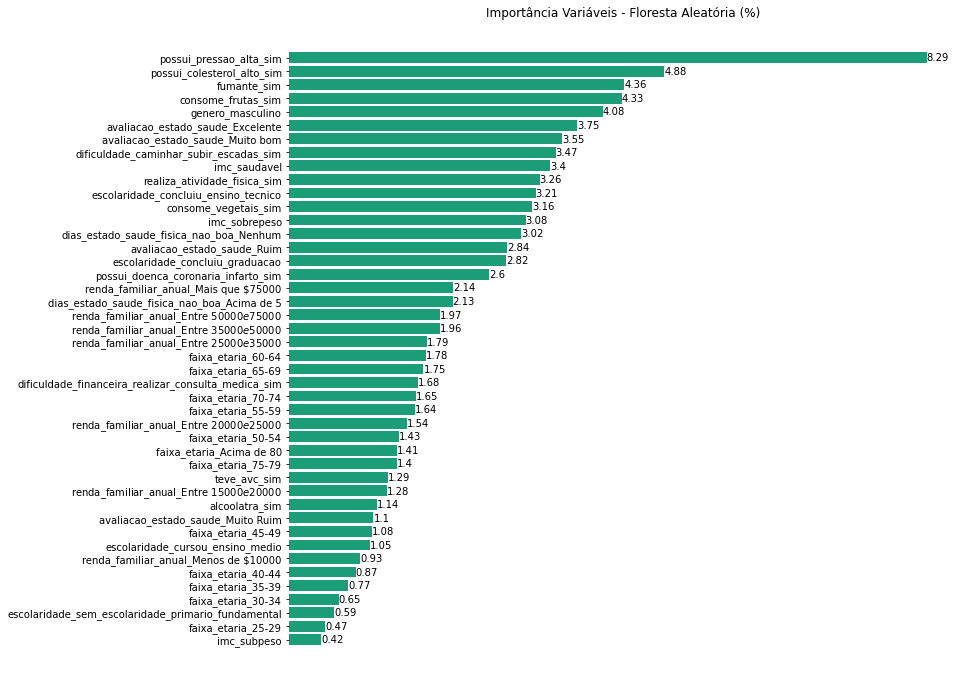

In [63]:
features_rf = rf.feature_importances_
feature_importance_dict_rf = dict(zip(X_under.columns, features_rf))
sorted_features_rf = sorted(feature_importance_dict_rf.items(), key=lambda x: x[1], reverse=True)
sorted_features_rf_gf = sorted(feature_importance_dict_rf.items(), key=lambda x: x[1], reverse=False)
display(sorted_features_rf)
categorias_rf = []
valores_rf = []
for valor in sorted_features_rf_gf:
    categorias_rf.append(valor[0])
    valores_rf.append(round(valor[1],4)*100)

plt.figure(figsize=(12,12))
plt.title('Importância Variáveis - Floresta Aleatória (%)')
barras = plt.barh(categorias_rf,valores_rf,color = cores[0])
#plt.xlabel(categorias_rf,fontweight = 'bold')
plt.bar_label(barras)
plt.box(False)
plt.xticks([])
plt.savefig('variaveis_rf_sem_colesterol.png', dpi=400,bbox_inches = "tight")
plt.show()

### Análise Variáveis - Regressão Logística

[('faixa_etaria_70-74', 1.6898407369043442),
 ('faixa_etaria_65-69', 1.576610828944429),
 ('faixa_etaria_75-79', 1.5726220219997344),
 ('faixa_etaria_Acima de 80', 1.4580556735398051),
 ('faixa_etaria_60-64', 1.3438004868366171),
 ('faixa_etaria_55-59', 1.1937679117394078),
 ('faixa_etaria_50-54', 1.0870042882478133),
 ('faixa_etaria_45-49', 0.8213211550343116),
 ('possui_pressao_alta_sim', 0.7571836891864152),
 ('faixa_etaria_40-44', 0.6811464259266579),
 ('avaliacao_estado_saude_Muito Ruim', 0.568915269084691),
 ('possui_colesterol_alto_sim', 0.5286615873294592),
 ('avaliacao_estado_saude_Ruim', 0.449204811842454),
 ('faixa_etaria_35-39', 0.39472366861785635),
 ('possui_doenca_coronaria_infarto_sim', 0.28424742426112487),
 ('genero_masculino', 0.24424269381338032),
 ('teve_avc_sim', 0.20580494876162558),
 ('dificuldade_caminhar_subir_escadas_sim', 0.16566761579401995),
 ('faixa_etaria_30-34', 0.15092998572956107),
 ('escolaridade_sem_escolaridade_primario_fundamental', 0.122884201237

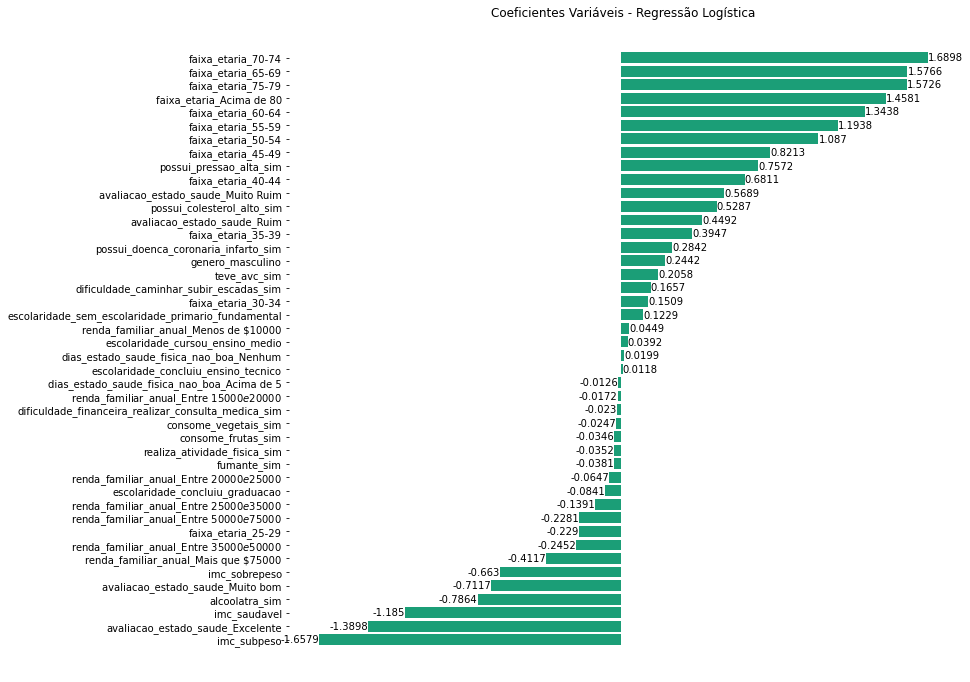

In [64]:
features_lr = lr.coef_[0]
features_lr_dict = dict(zip(X_under.columns, features_lr))
sorted_features_lr = sorted(features_lr_dict.items(), key=lambda x: x[1], reverse=True)
sorted_features_lr_gf = sorted(features_lr_dict.items(), key=lambda x: x[1], reverse=False)
display(sorted_features_lr)
categorias_lr = []
valores_lr = []
for valor in sorted_features_lr_gf:
    categorias_lr.append(valor[0])
    valores_lr.append(round(valor[1],4))

plt.figure(figsize=(12,12))
plt.title('Coeficientes Variáveis - Regressão Logística')
barras = plt.barh(categorias_lr,valores_lr,color = cores[0])
plt.bar_label(barras)
plt.box(False)
plt.xticks([])
plt.savefig('variaveis_lr_sem_colesterol.png', dpi=400,bbox_inches = "tight")
plt.show()

In [65]:
teste = pd.Series(sorted_features_lr)

In [66]:
print(teste)

0              (faixa_etaria_70-74, 1.6898407369043442)
1               (faixa_etaria_65-69, 1.576610828944429)
2              (faixa_etaria_75-79, 1.5726220219997344)
3        (faixa_etaria_Acima de 80, 1.4580556735398051)
4              (faixa_etaria_60-64, 1.3438004868366171)
5              (faixa_etaria_55-59, 1.1937679117394078)
6              (faixa_etaria_50-54, 1.0870042882478133)
7              (faixa_etaria_45-49, 0.8213211550343116)
8         (possui_pressao_alta_sim, 0.7571836891864152)
9              (faixa_etaria_40-44, 0.6811464259266579)
10    (avaliacao_estado_saude_Muito Ruim, 0.56891526...
11     (possui_colesterol_alto_sim, 0.5286615873294592)
12     (avaliacao_estado_saude_Ruim, 0.449204811842454)
13            (faixa_etaria_35-39, 0.39472366861785635)
14    (possui_doenca_coronaria_infarto_sim, 0.284247...
15              (genero_masculino, 0.24424269381338032)
16                  (teve_avc_sim, 0.20580494876162558)
17    (dificuldade_caminhar_subir_escadas_sim, 0

### Análise Variáveis - XGBoost

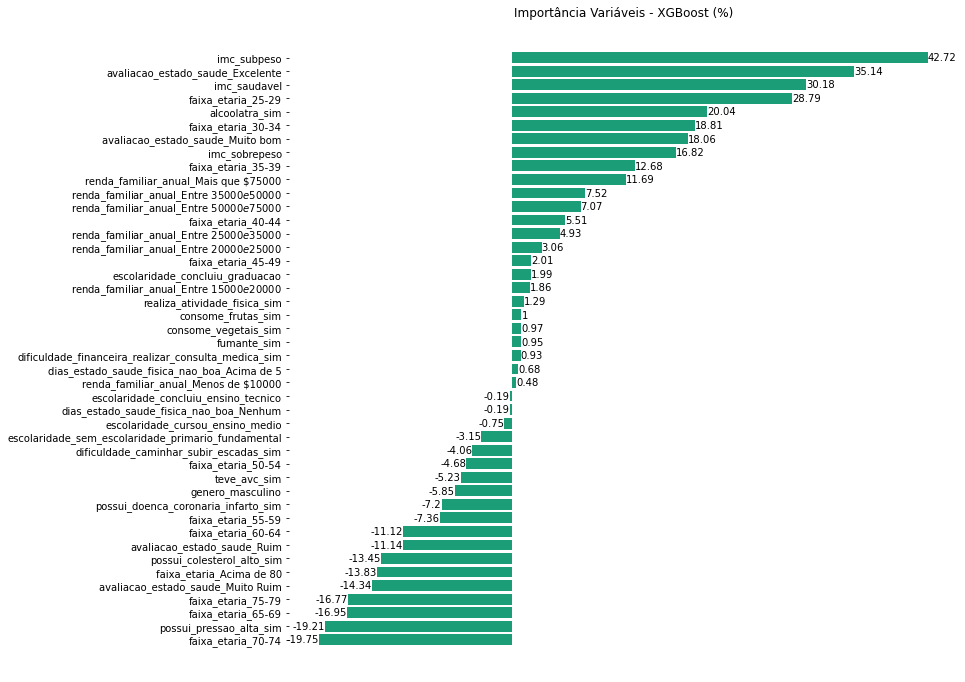

In [67]:
features_xg = xgb.feature_importances_
feature_importance_dict = dict(zip(X_under.columns, features_xg))
sorted_features_xgb = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_features_xgb_gr = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=False)
sorted_features_xgb


categorias_xg = []
valores_xg = []
for valor in sorted_features_xgb_gr:
    categorias_xg.append(valor[0])
    valores_xg.append(round(valor[1],4)*100)
plt.figure(figsize=(12,12))
plt.title('Importância Variáveis - XGBoost (%)')
barras = plt.barh(categorias_xg,valores_xg,color = cores[0])
#plt.xlabel(categorias_rf,fontweight = 'bold')
plt.bar_label(barras)
plt.box(False)
plt.xticks([])
plt.savefig('variaveis_xg_sem_colesterol.png', dpi=400,bbox_inches = "tight")
plt.show()

In [68]:
sum(valores_xg)

99.95999922975898